In [1]:
import os, sys
import numpy as np
from math import fsum
import matplotlib.pyplot as plt

PROJECT_DIR = os.path.abspath('../code')
sys.path.append(PROJECT_DIR)

In [2]:
# Import main classes.
from src.genome.gene import Gene
from src.genome.chromosome import Chromosome
from src.engines.standard_ga import StandardGA

# Import Selection Operators.
from src.operators.selection.tournament_selector import TournamentSelector
from src.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operators.
from src.operators.crossover.uniform_crossover import UniformCrossover
from src.operators.crossover.single_point_crossover import SinglePointCrossover

# Import Mutation Operators.
from src.operators.mutation.swap_mutator import SwapMutator
from src.operators.mutation.random_mutator import RandomMutator

## Sphere optimization

In [3]:
# Shpere function.
def fun_Sphere(_chromosome):
    
    # Return the negative (to account for minimization).
    return -fsum([xi.datum**2 for xi in _chromosome])
# _end_def_

# Random function ~N(0,1).
_func = lambda: np.random.normal()

In [26]:
# Define the number of genes.
M = 40

# Define the number of chromosomes.
N = 130

# Initial population.
population = [Chromosome([Gene(np.random.uniform(-2.0, +2.0), _func) for j in range(M)], np.nan, True)
              for i in range(N)]

# Set the fitness function.
fun_optim = fun_Sphere

# Create the StandardGA.
toy_GA = StandardGA(initial_pop=population, fit_func=fun_optim,
                    select_op=LinearRankSelector(),
                    mutate_op=RandomMutator(0.1),
                    cross_op=UniformCrossover())

In [27]:
toy_GA.run(epochs=1000, elitism=True, f_tol=1.0e-6, verbose=False)

Initial Avg. Fitness = -54.1574
Final   Avg. Fitness = -0.1222
Elapsed time: 104.604 seconds.


In [28]:
print(f"Best Fitness: {toy_GA.best_chromosome().fitness:.5f}\n")

for i, xi in enumerate(toy_GA.best_chromosome()._genome):
    print(f"x{i} = {xi.datum:.5f}")

Best Fitness: -0.00573

x0 = -0.03386
x1 = -0.01907
x2 = -0.00803
x3 = -0.01471
x4 = 0.00006
x5 = -0.00419
x6 = -0.00772
x7 = 0.00122
x8 = -0.00513
x9 = -0.00042
x10 = -0.00238
x11 = 0.02286
x12 = 0.00058
x13 = 0.00787
x14 = 0.02274
x15 = -0.00621
x16 = 0.00309
x17 = 0.01040
x18 = 0.00424
x19 = 0.01200
x20 = -0.01839
x21 = -0.00885
x22 = 0.01164
x23 = 0.00320
x24 = -0.02579
x25 = 0.00530
x26 = -0.00092
x27 = -0.01505
x28 = 0.01693
x29 = 0.00045
x30 = 0.00294
x31 = -0.01823
x32 = -0.00448
x33 = -0.00788
x34 = 0.00996
x35 = -0.00892
x36 = 0.00366
x37 = -0.00250
x38 = 0.00401
x39 = 0.00034


In [29]:
toy_GA.print_operator_stats()

 UniformCrossover: (4922655584)
 _probability: 0.9
 _rng: Generator(PCG64)
 _counter: 65000

 LinearRankSelector: (4930200864)
 _probability: 1.0
 _rng: Generator(PCG64)
 _counter: 1000

 RandomMutator: (4923135840)
 _probability: 0.1
 _rng: Generator(PCG64)
 _counter: 13133



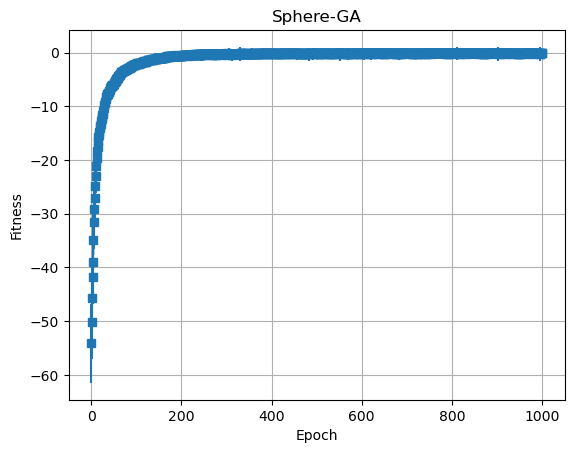

In [30]:
plt.errorbar(x=range(len(toy_GA.stats['avg'])),
             y=toy_GA.stats['avg'], yerr=toy_GA.stats['std'], fmt='--s')

plt.grid(True)
plt.title("Sphere-GA")
plt.xlabel("Epoch")
plt.ylabel("Fitness");